<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/main/ARIMA_wind_Speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Import Dataset**

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv')
df=df[['Date & Time','Wind Speed m/s']]
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df["Wind Speed m/s"] = pd.to_numeric(df["Wind Speed m/s"], downcast="float")
df.set_index('Date & Time',inplace=True)
df=df.head(10000)
df.tail()

,Wind Speed m/s
Date & Time,
2021-06-03 03:45:50,8.3
2021-06-03 03:46:00,7.2
2021-06-03 03:46:10,7.8
2021-06-03 03:46:20,7.6
2021-06-03 03:46:30,7.4


In [33]:
type(df)

pandas.core.frame.DataFrame

# **Convert to series**

In [34]:
df_series=df.values
type(df_series)

numpy.ndarray

In [35]:
df.size

10000

In [36]:
df.describe()

,Wind Speed m/s
count,10000.00000
mean,8.07975
std,0.93782
min,4.80000
25%,7.40000
50%,8.10000
75%,8.70000
max,11.40000


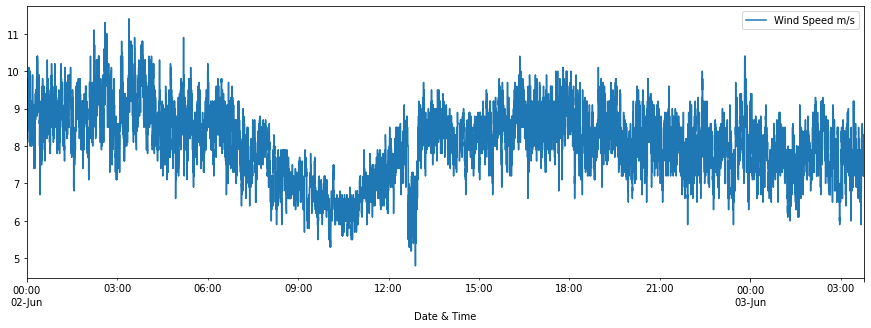

In [37]:
df.plot(figsize=(15,5))

# ***Smoothing***

In [38]:
df_mean=df.rolling(window = 10).mean()#taking moving average

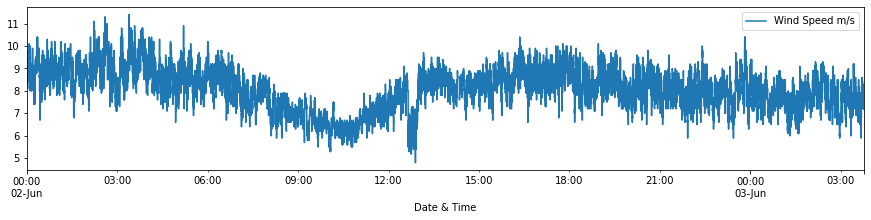

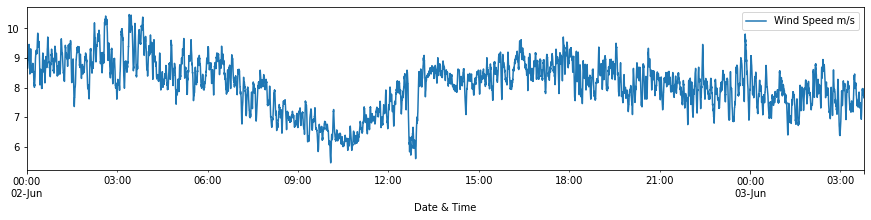

In [39]:
df.plot(figsize=(15,3))
df_mean.plot(figsize=(15,3))

# **Base line model**

In [40]:
value=pd.DataFrame(df_series)# same as df

In [41]:
df_new=pd.concat([df,df.shift(1)],axis=1)
df_new.head()

,Wind Speed m/s,Wind Speed m/s
Date & Time,,
2021-06-02 00:00:00,8.4,NaN
2021-06-02 00:00:10,8.3,8.4
2021-06-02 00:00:20,8.2,8.3
2021-06-02 00:00:30,8.4,8.2
2021-06-02 00:00:40,9.2,8.4


In [64]:
df_new.columns = ['Actual','Forecast']
df_new=df_new.head(100)

In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [66]:
df_new=df_new[1:]
df_new.head()

,Actual,Forecast
Date & Time,,
2021-06-02 00:00:20,8.2,8.3
2021-06-02 00:00:30,8.4,8.2
2021-06-02 00:00:40,9.2,8.4
2021-06-02 00:00:50,9.1,9.2
2021-06-02 00:01:00,9.2,9.1


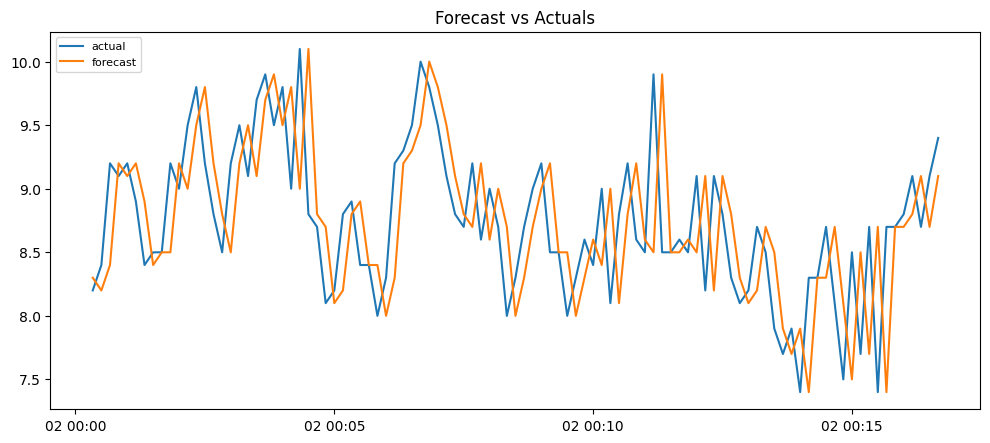

In [67]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(df_new['Actual'], label='training')
plt.plot(df_new['Actual'], label='actual')
plt.plot(df_new['Forecast'], label='forecast',)
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [68]:
error=mean_squared_error(df_new.Actual,df_new.Forecast)
error

0.30919188

In [69]:
np.sqrt(error)

0.55605024

# **Identify the best Order for ARIMA**

In [47]:
pip install pmdarima

In [48]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Wind Speed m/s'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13583.304, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12317.958, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11750.190, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13581.305, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11585.331, Time=4.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11447.840, Time=10.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11920.411, Time=1.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11339.560, Time=20.66 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11846.407, Time=1.83 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11339.112, Time=21.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11705.095, Time=1.79 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=11306.482, Time=27.91 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=11661.118, Time=3.70 sec
 ARIMA(5,1,2)(0,0,0)

# ***ARIMA*** **(p,d,q)**
Autoregressive (p) Integrated(d) Moving Average(q)


*   ***pacf*** for identify p
*   ***acf*** for identify q



In [70]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [71]:
adf_test(df['Wind Speed m/s'])

1. ADF :  -5.246438617800371
2. P-Value :  7.062515171597382e-06
3. Num Of Lags :  38
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 9961
5. Critical Values :
	 1% :  -3.4310066595695945
	 5% :  -2.861830204343065
	 10% :  -2.5669244706354584


In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

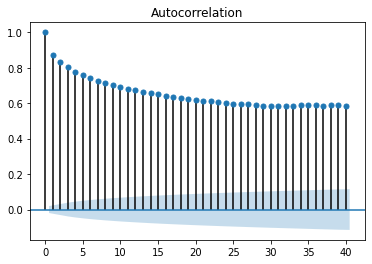

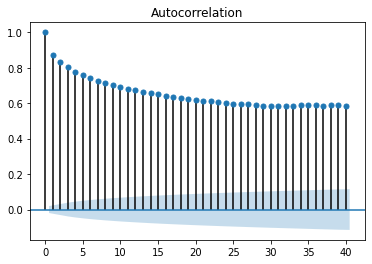

In [51]:
plot_acf(df)# to q=17

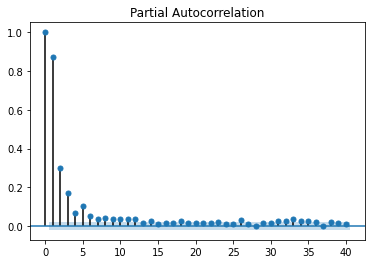

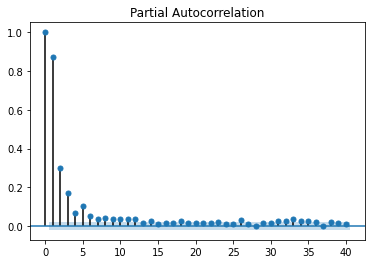

In [52]:
plot_pacf(df)#to p=3

In [55]:
#p=2  d=0 q=5,6

df_train=df[0:9000]
df_test=df[9000:]

In [72]:
from statsmodels.tsa.arima_model import ARIMA
df_model=ARIMA(df_train,order=(5,0,1))
df_model_fit=df_model.fit()
df_model_fit.aic

10173.585726937657

In [73]:
df_forecast= df_model_fit.forecast(steps=1000)[0]

In [74]:
df_forecast=pd.DataFrame(df_forecast,index=df_test.index)
df_forecast.columns=['Wind Speed m/s']
df_forecast.tail()

,Wind Speed m/s
Date & Time,
2021-06-03 03:45:50,8.100314
2021-06-03 03:46:00,8.100390
2021-06-03 03:46:10,8.100466
2021-06-03 03:46:20,8.100543
2021-06-03 03:46:30,8.100619


In [75]:
df_test.tail()

,Wind Speed m/s
Date & Time,
2021-06-03 03:45:50,8.3
2021-06-03 03:46:00,7.2
2021-06-03 03:46:10,7.8
2021-06-03 03:46:20,7.6
2021-06-03 03:46:30,7.4


In [76]:
np.sqrt(mean_squared_error(df_test,df_forecast))

0.7359254770335534

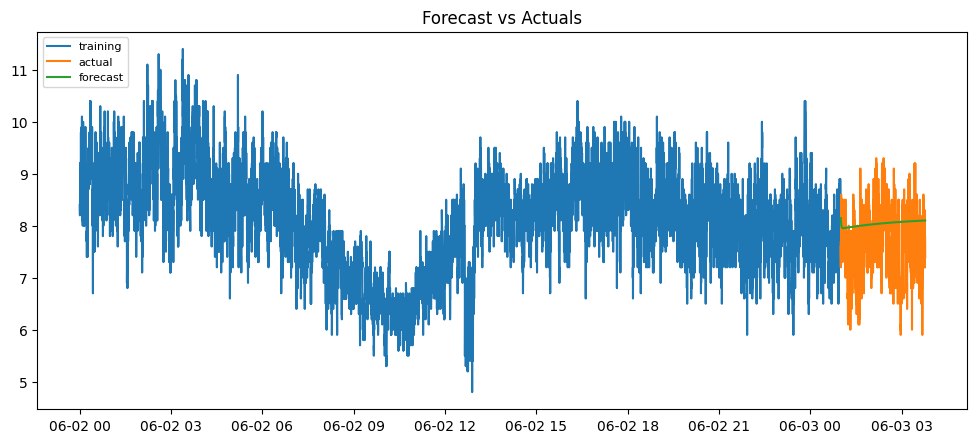

In [77]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='training')
plt.plot(df_test, label='actual')
plt.plot(df_forecast, label='forecast',)
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()